In [2]:
import pandas as pd
from path import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np

### Data Preparation

In [3]:
file = Path('crypto_data.csv')

In [4]:
df = pd.read_csv(file, index_col=0)
df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [5]:
# List all algorithms in use
print(set(df['Algorithm']))

{'SHA3-256', 'T-Inside', 'POS 2.0', 'Counterparty', 'PHI1612', 'Lyra2RE', 'Lyra2REv2', 'CryptoNight-V7', 'Blake2S', 'Progressive-n', 'X13', 'NeoScrypt', '536', 'BLAKE256', 'QUAIT', 'Exosis', 'Quark', 'XG Hash', 'PoS', 'Wild Keccak', 'QuarkTX', 'Curve25519', 'Equihash1927', 'VeChainThor Authority', 'Green Protocol', 'SHA-256D', 'XEVAN', 'X11', 'Skein', 'SkunkHash', 'CryptoNight-lite', 'CryptoNight', 'TRC10', 'Equihash', 'SHA-512', 'QuBit', 'VBFT', 'Slatechain', 'Ethash', 'Zhash', 'ScryptOG', 'HybridScryptHash256', 'SHA3', 'Keccak', 'Dagger-Hashimoto', 'DPoS', 'NIST5', 'ECC 256K1', 'Multiple', 'Proof-of-BibleHash', 'IMesh', 'Time Travel', 'X15', 'X16R', 'SHA-256 + Hive', 'Scrypt-n', 'Stanford Folding', 'HMQ1725', 'Avesta hash', 'Dagger', 'Cryptonight-GPU', 'C11', 'Ouroboros', 'CryptoNight Heavy X', 'M7 POW', 'Equihash+Scrypt', 'CryptoNight Heavy', 'vDPOS', 'Semux BFT consensus', 'Cloverhash', 'Groestl', 'SkunkHash v2 Raptor', 'YescryptR16', 'Blake', 'X11GOST', 'Scrypt', 'Leased POS', 'M0

In [6]:
# print the counts of stocks being currently traded vs. not being currently traded 
df['IsTrading'].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [7]:
# Select only cryptocurrencies that are being traded
df=df[df['IsTrading']==True]
df['IsTrading'].value_counts()

True    1144
Name: IsTrading, dtype: int64

In [8]:
# Delete the IsTrading column; it is no longer necessary
df.drop(columns=['IsTrading'],inplace=True)
df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [9]:
# Delete all rows with null values
df.dropna(inplace=True)
df.shape

(685, 5)

In [10]:
# Sort values in TotalCoinsMined to identify negative or zero values
df['TotalCoinsMined'].sort_values()

FIII   -5.917978e+09
LBTC    0.000000e+00
RIPO    0.000000e+00
BASH    0.000000e+00
CSH     0.000000e+00
            ...     
QWC     9.955311e+10
NYC     1.430067e+11
GCN     1.630551e+11
BCN     1.840668e+11
BTT     9.899887e+11
Name: TotalCoinsMined, Length: 685, dtype: float64

In [11]:
# Select only rows with positive TotalCoinsMined values
df=df[df['TotalCoinsMined']>0]
len(df)

532

In [12]:
# Delete the CoinName column from the original dataframe
df.drop(columns=['CoinName'],inplace=True)
df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [13]:
# Create dummy variables for columns with string values
X=pd.get_dummies(data=df,columns=['Algorithm','ProofType'])
print(X.shape)
X.head()

(532, 98)


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Standardize the data
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [15]:
# print the scaled data
X_scaled[0]

array([-0.11710817, -0.1528703 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.07530656, -0.0433963 , -0.06142951, -0.06142951,
       -0.0433963 , -0.0433963 , -0.19245009, -0.06142951, -0.09740465,
       -0.0433963 , -0.11547005, -0.07530656, -0.0433963 , -0.0433963 ,
       -0.15191091, -0.0433963 , -0.13118084, -0.0433963 , -0.0433963 ,
       -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.0433963 , -0.08703883, -0.08703883, -0.08703883,
       -0.0433963 , -0.13118084, -0.13840913, -0.13840913, -0.0433963 ,
       -0.06142951, -0.0433963 , -0.07530656, -0.18168574, -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.07530656, -0.15826614, -0.31491833,
       -0.0433963 , -0.08703883, -0.07530656, -0.06142951,  1.38675049,
       -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.39879994, -0.0433963 , -0.18168574, -0.04

In [16]:
# Identify the numbers of rows and columns in the scaled data
X_scaled.shape

(532, 98)

### Reduce dataset dimensions with PCA

In [17]:
# Reduce dimensions with PCA
# Preserving 99% dimensions
pca=PCA(n_components=0.99)
pca_transformed=pca.fit_transform(X_scaled)
pca_transformed.shape

(532, 86)

In [18]:
# Reduce dimensions with PCA
# Preserving 90% dimensions
pca=PCA(n_components=0.90)
pca_transformed=pca.fit_transform(X_scaled)
pca_transformed.shape

(532, 74)

With 0.90 74 out of 98 dimensions are preserved. With 0.99 86 dimensions out of 98 are preserved.

In [19]:
# The sum of the explained variance of the principal components
pca.explained_variance_.sum()

88.47283457566154

In [20]:
# Reduce dimensions with t-SNE
tsne=TSNE(perplexity=50)
tsne_features=tsne.fit_transform(pca_transformed)
tsne_features.shape

c:\hari\python38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\hari\python38\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(532, 2)

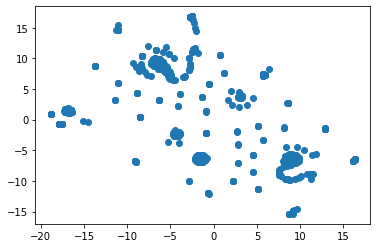

In [21]:
# Plot t-SNE output
x=tsne_features[:,0]
y=tsne_features[:,1]
plt.scatter(x,y)
plt.show()

t-SNE preserves only 2 dimenions.There are some clusters with few cryptos.None that standout.

In [24]:
# Identify clusters with k-means
inertia=[]
k=list(range(1,11))
for i in k:
    km=KMeans(n_clusters=i,random_state=42)
    km.fit(pca_transformed)
    inertia.append(km.inertia_)
elbow_data = {'k':k,'inertia':inertia}
df_elbow_data=pd.DataFrame(elbow_data)

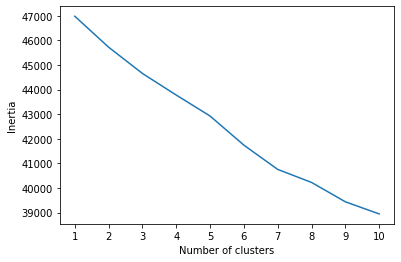

In [26]:
# Create an elbow plot
plt.plot(df_elbow_data['k'],df_elbow_data['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

There is no elbow for the Kmeans,but at k=7 appears to be a slight hint of elbow. From the plot we can interpret that there are no clear clusters under which we can group cryptos.

In [27]:
# Looking at Silhoutee coefficents to confirm our elbow conclusion 
silhouette_coefficients=[]
k=list(range(2,11))
for i in k:
    km=KMeans(n_clusters=i,random_state=42)
    km.fit(pca_transformed)
    score=silhouette_score(pca_transformed, km.labels_)
    silhouette_coefficients.append(score)

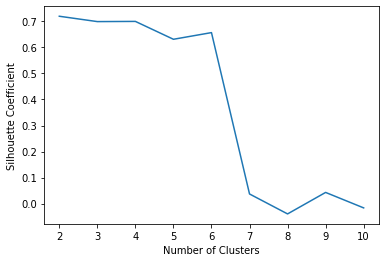

In [28]:
# Looking at plot of Silhoutee coefficients
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

This again confirms that there are no large clusters in which cryptos can be grouped.

In [29]:
#Run KMeans with 7 or more clusters and print no.of crypto currencies in each cluster.
#That way we can see how the currencies are distributed in each cluster.
for i in list(range(7,11)):
    model=KMeans(n_clusters=i,random_state=42)
    model.fit(pca_transformed)
    predictions=model.predict(pca_transformed)
    values,counts=np.unique(predictions,return_counts=True)
    print(f"clusters:{i},\n Values:{values} \n Counts:{counts}")

clusters:7,
 Values:[0 1 2 3 4 5 6] 
 Counts:[193   1   1   1   1 334   1]
clusters:8,
 Values:[0 1 2 3 4 5 6 7] 
 Counts:[507   1   1  17   1   3   1   1]
clusters:9,
 Values:[0 1 2 3 4 5 6 7 8] 
 Counts:[  1 253   4  94 175   1   1   1   2]
clusters:10,
 Values:[0 1 2 3 4 5 6 7 8 9] 
 Counts:[ 13  19   1   1   1   1 493   1   1   1]


Looking at this at k=9 seems to have more currencies grouped in a cluster with fewer clusters with only 1 currency.

In [43]:
# Predict with k=9
model=KMeans(n_clusters=9,random_state=42)
model.fit(pca_transformed)
predictions=model.predict(pca_transformed)

In [44]:
df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


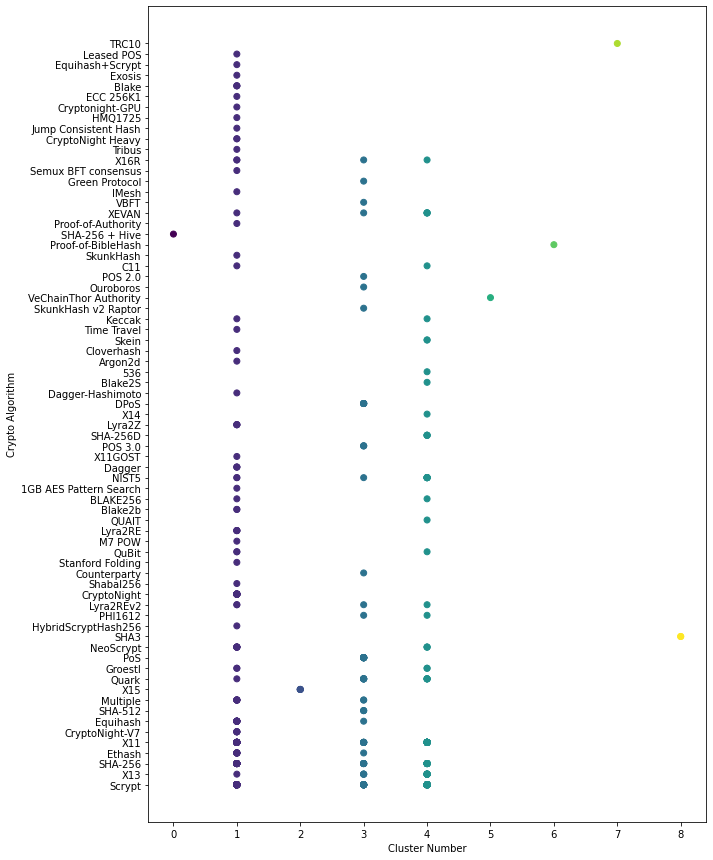

In [60]:
#Scatter Plot by Crypto Algorithm and predicted cluster
plt.figure(figsize=(10, 15))
plt.scatter(predictions,df.iloc[:,0],c=predictions)
plt.ylabel('Crypto Algorithm')
plt.xlabel('Cluster Number')
#plt.yticks([])
plt.show()

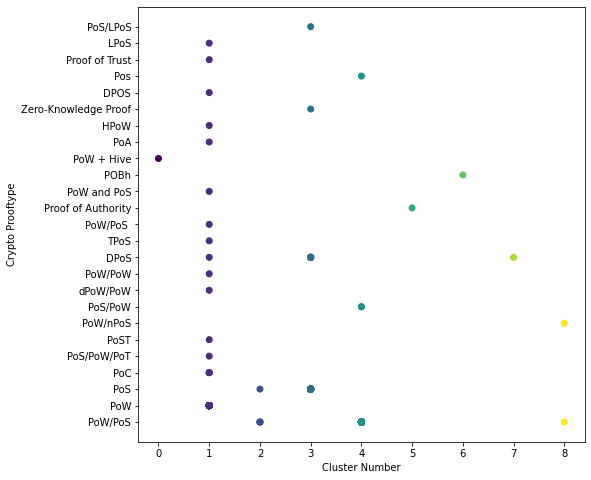

In [62]:
#Scatter Plot by Crypto ProofType and predicted cluster
plt.figure(figsize=(8,8))
plt.scatter(predictions,df.iloc[:,1],c=predictions)
plt.ylabel('Crypto Prooftype')
plt.xlabel('Cluster Number')
plt.show()

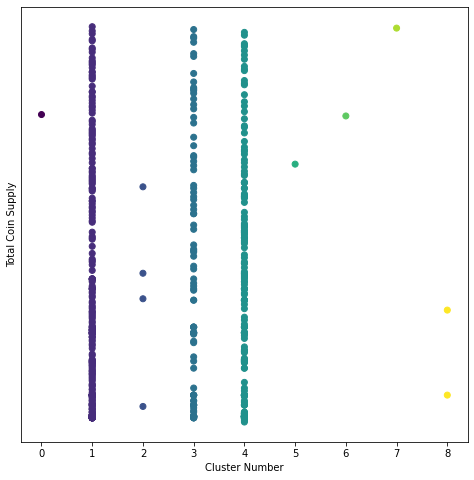

In [65]:
#Scatter Plot by Crypto Coin supply and predicted cluster
plt.figure(figsize=(8,8))
plt.scatter(predictions,df.iloc[:,3],c=predictions)
plt.ylabel('Total Coin Supply')
plt.xlabel('Cluster Number')
plt.yticks([])
plt.show()

As shown through t-SNE there are multiple(many) clusters with few currencies in a cluster. There is no reasonable way to group them.Some currencies are in a cluster by themselves.The best option is it group them in 9(k) clusters, that way we have few clusters with lesser no.of currencies. Cluster numbers 1,3 and 4 need to analyzed further for investment.